In [52]:
import nltk
import matplotlib.pyplot as plt
import pandas as pd
from wordcloud import WordCloud
import numpy as np

subreddit = 'conspiracy'
type_of_content = 'filtered'
stop = nltk.corpus.stopwords.words('english')

read file and add title and selftext to process

todo: preprocess - dates x200b bill gate social medium? 

In [53]:
filename = f'./data/{subreddit}_filtered.csv'
dataframe = pd.read_csv(filename)

In [54]:
dataframe['self_text'] = dataframe['self_text'].apply(str)
selftexts = dataframe[['self_text']]
selftexts = selftexts.drop(selftexts.index[selftexts['self_text'] == 'delete'], axis=0, inplace=False)
selftexts = selftexts.drop(selftexts.index[selftexts['self_text'] == 'remove'], axis=0, inplace=False)
selftexts = selftexts.drop(selftexts.index[selftexts['self_text'] == 'nan'], axis=0, inplace=False)

dataframe['title'] = dataframe['title'].apply(str)
titles = dataframe[['title']]
titles = titles.drop(titles.index[titles['title'] == 'nan'], axis=0, inplace=False)

submissions = list(dataframe.title) + list(selftexts.self_text)

In [55]:
preprocessed_submissions = []

for submission in submissions:
    submission = [word for word in submission.split() if word not in stop]
    preprocessed_submissions.append(submission)

In [70]:
from sklearn.feature_extraction.text import CountVectorizer

def createWordCloud(ngram_range):
    submissions_string = []

    for submission in preprocessed_submissions:
        submissions_string.append(' '.join(submission))

    countvec = CountVectorizer(ngram_range=ngram_range)
    ngrams = countvec.fit_transform(submissions_string)
    count_values = ngrams.toarray().sum(axis=0)
    vocab = countvec.vocabulary_
    df_ngram = pd.DataFrame([(k,count_values[i]) for k,i in vocab.items()]).rename(columns={0: 'ngram', 1:'frequency'})
    df_ngram = df_ngram.sort_values(by='frequency', ascending=False)
    df_ngram.head(20).plot.barh(x='ngram', y='frequency', title=f'r/{subreddit} Word Frequencies', color='thistle').invert_yaxis()

    df_ngram = df_ngram.set_index('ngram').to_dict()
    wc = WordCloud(max_words=100, background_color='white').generate_from_frequencies(df_ngram['frequency'])
    plt.figure(figsize = (14, 14))
    plt.axis('off')
    plt.title(f'r/{subreddit} wordcloud')
    plt.imshow(wc)

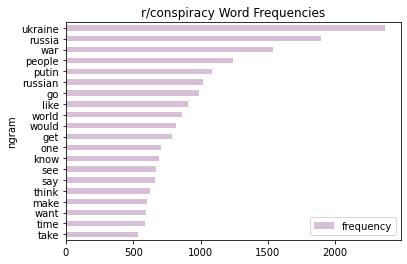

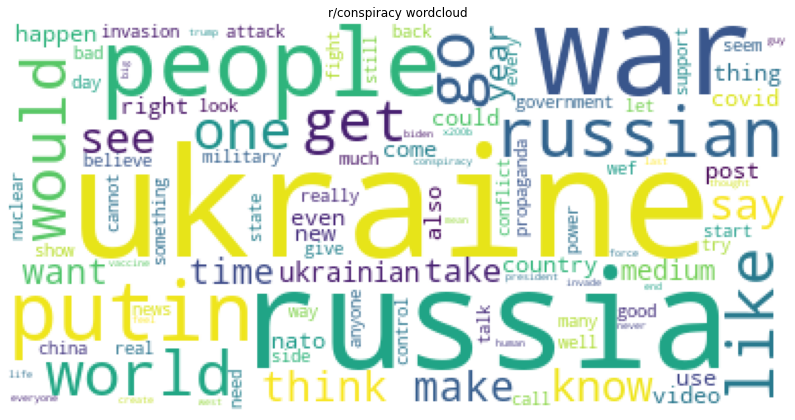

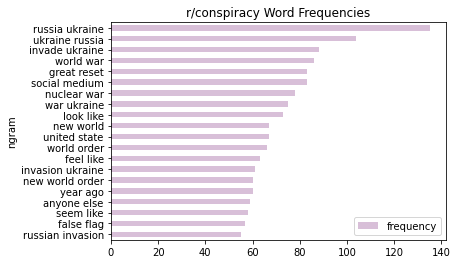

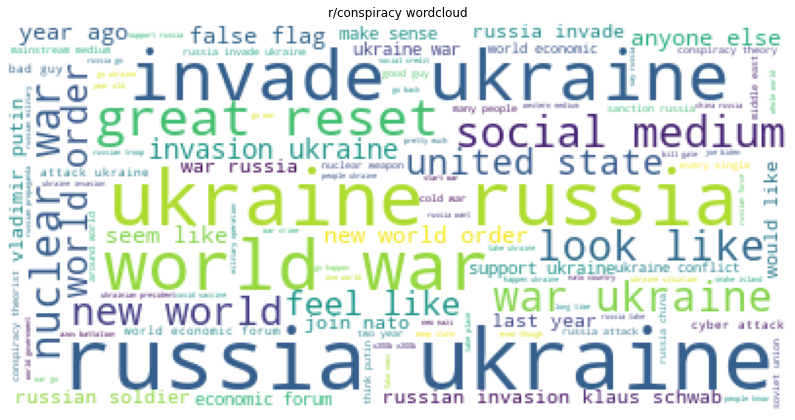

In [71]:
createWordCloud((1,1))
createWordCloud((2,3))

covid always in connection to war! in r/conspiracy

todo: i.e. filter for only nouns
check which pronouns are prevalent